<a href="https://colab.research.google.com/github/saiful1604008/Thesis/blob/main/resnet50_with_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np 
import pandas as pd 
import os
import sys
import shutil   
from tensorflow import keras
from keras import backend as K
from keras.models import Sequential
from keras import optimizers
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import History 
from sklearn.metrics import classification_report, confusion_matrix
import keras
from tensorflow.keras.optimizers import Adam
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import LeakyReLU
import tensorflow as tf

In [40]:
data_dir_train = "/content/drive/MyDrive/hack_train/"
data_dir_test = "/content/drive/MyDrive/hack_test/"
num_classes = 2

In [41]:
datagen = ImageDataGenerator(
    rescale = 1.0/255,
    
)

train_gen = datagen.flow_from_directory(
    directory= data_dir_train,
    target_size = (125,125),
    batch_size = 30,
    color_mode = 'rgb',
    shuffle = True,
    class_mode = 'binary'
)

valid_gen = datagen.flow_from_directory(
    directory= data_dir_test,
    target_size = (125,125),
    batch_size = 30,
    color_mode = 'rgb',
    shuffle = False,
    class_mode = 'binary'

)

Found 591 images belonging to 2 classes.
Found 144 images belonging to 2 classes.


In [42]:
input_shape = train_gen.image_shape
input_shape

(125, 125, 3)

In [47]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(125,125,3),
                   pooling='max',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(keras.layers.Flatten())
resnet_model.add(keras.layers.Dense(128,activation = 'relu'))
resnet_model.add(keras.layers.Dense(2,activation='softmax'))

In [48]:
resnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               262272    
                                                                 
 dense_10 (Dense)            (None, 2)                 258       
                                                                 
Total params: 23,850,242
Trainable params: 262,530
Non-trainable params: 23,587,712
_________________________________________________________________


In [49]:
resnet_model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.0005),
              metrics = ['accuracy'])

In [50]:
Epoch = 10
batchSize = 32

history = resnet_model.fit(train_gen,
                    batch_size = batchSize,
                    epochs=Epoch,
                    validation_data=valid_gen,
                    verbose = 1)

Epoch 1/10
20/20 [==============================] - 45s 2s/step - loss: 0.4675 - accuracy: 0.7733 - val_loss: 0.3448 - val_accuracy: 0.8889
Epoch 2/10
20/20 [==============================] - 41s 2s/step - loss: 0.2449 - accuracy: 0.9171 - val_loss: 0.3116 - val_accuracy: 0.8611
Epoch 3/10
20/20 [==============================] - 41s 2s/step - loss: 0.2030 - accuracy: 0.9205 - val_loss: 0.2822 - val_accuracy: 0.8611
Epoch 4/10
20/20 [==============================] - 41s 2s/step - loss: 0.1896 - accuracy: 0.9205 - val_loss: 0.2700 - val_accuracy: 0.8889
Epoch 5/10
20/20 [==============================] - 42s 2s/step - loss: 0.1800 - accuracy: 0.9323 - val_loss: 0.2332 - val_accuracy: 0.8958
Epoch 6/10
20/20 [==============================] - 41s 2s/step - loss: 0.1578 - accuracy: 0.9323 - val_loss: 0.2320 - val_accuracy: 0.8958
Epoch 7/10
20/20 [==============================] - 41s 2s/step - loss: 0.1466 - accuracy: 0.9425 - val_loss: 0.2042 - val_accuracy: 0.8958
Epoch 8/10
20/20 [==

In [51]:
resnet_model.evaluate(valid_gen)

5/5 [==============================] - 8s 2s/step - loss: 0.1845 - accuracy: 0.9028


[0.18448728322982788, 0.9027777910232544]

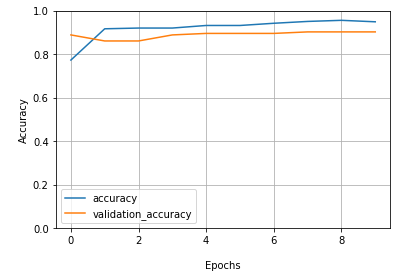

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.legend()
plt.axis(ymin=0,ymax=1)
plt.ylabel('\nAccuracy')
plt.xlabel('\nEpochs')
plt.grid()
plt.show()


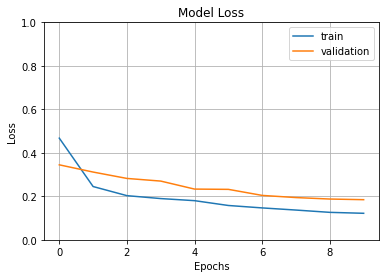

In [54]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [55]:

Y_pred_res = resnet_model.predict_generator(valid_gen)
y_pred_res = np.argmax(Y_pred_res, axis=1)
print('Confusion Matrix')
conf_matrix_res = confusion_matrix(valid_gen.classes, y_pred_res)
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)

print('Classification Report')
target_names = ['Normal', 'Seizure']
class_rep_res = classification_report(valid_gen.classes, y_pred_res, target_names=target_names)
print(class_rep_res)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Confusion Matrix
[[64  8]
 [ 6 66]]
Classification Report
              precision    recall  f1-score   support

      Normal       0.91      0.89      0.90        72
     Seizure       0.89      0.92      0.90        72

    accuracy                           0.90       144
   macro avg       0.90      0.90      0.90       144
weighted avg       0.90      0.90      0.90       144



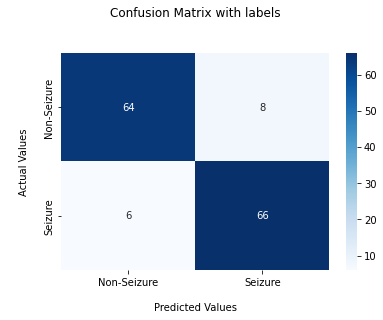

In [58]:
import seaborn as sns
ax = sns.heatmap(conf_matrix_res, annot=True, cmap = 'Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('\nActual Values\n');
ax.xaxis.set_ticklabels(['Non-Seizure','Seizure'])
ax.yaxis.set_ticklabels(['Non-Seizure','Seizure'])
plt.show()

In [59]:
import sklearn.metrics as metrics
y_pred_keras = resnet_model.predict(valid_gen)
preds = y_pred_keras[:,1]
fpr_keras, tpr_keras, thresholds_keras = metrics.roc_curve(valid_gen.classes, preds)
roc_auc = metrics.auc(fpr_keras, tpr_keras)

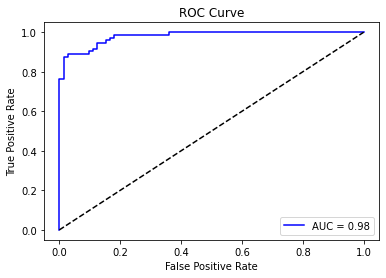

In [62]:
plt.title('ROC Curve')
plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()